In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scst
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.special import logit, expit

In [2]:
train_df = pd.read_csv('train_benchmark.csv')
test_df = pd.read_csv('test_benchmark.csv')

In [3]:
new_test_df = pd.concat([test_df[test_df['file_origin'] == '512_051015570'], \
                         test_df[test_df['file_origin'] == '512_051015571'], \
                         test_df[test_df['file_origin'] == '512_051015572'], \
                         test_df[test_df['file_origin'] == '512_130114570'], \
                         test_df[test_df['file_origin'] == '512_130114571'], \
                         test_df[test_df['file_origin'] == '512_130114572']])
new_test_df

,Unnamed: 0,1_156028951-156032951,19_838960-842960,19_35737922-35741922,19_41080891-41084891,4_185745070-185749070,16_75283369-75287369,fraction,file_origin
450,450,1.089253,1.250069,1.037599,0.248873,0.269718,0.699503,0.000,512_051015570
451,451,1.086535,1.249794,1.035817,0.249363,0.269641,0.697885,0.005,512_051015570
452,452,1.083806,1.249519,1.034025,0.249856,0.269564,0.696259,0.010,512_051015570
453,453,1.081064,1.249243,1.032220,0.250352,0.269487,0.694623,0.015,512_051015570
454,454,1.078309,1.248966,1.030405,0.250851,0.269409,0.692979,0.020,512_051015570
...,...,...,...,...,...,...,...,...,...
697,697,0.790787,1.171080,0.930378,0.403486,0.229104,0.559976,0.300,512_130114572
698,698,0.766478,1.208249,0.883794,0.413806,0.237465,0.532307,0.325,512_130114572
699,699,0.740663,1.246864,0.833704,0.424742,0.246240,0.502804,0.350,512_130114572
700,700,0.713198,1.287010,0.779696,0.436352,0.255461,0.471280,0.375,512_130114572


In [4]:
X_train = train_df.drop(['Unnamed: 0', 'fraction', 'file_origin'], axis = 1)
y_train = train_df['fraction']
X_test = new_test_df.drop(['Unnamed: 0', 'fraction', 'file_origin'], axis = 1)
y_test =  new_test_df['fraction']

In [5]:
parameters = {'alpha': [0.00005, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}
ls = Lasso()
grid_search = GridSearchCV(ls, parameters, scoring='neg_mean_absolute_error', cv=10, verbose=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10; 1/7] START alpha=5e-05................................................
[CV 1/10; 1/7] END ................alpha=5e-05;, score=-0.092 total time=   0.0s
[CV 2/10; 1/7] START alpha=5e-05................................................
[CV 2/10; 1/7] END ................alpha=5e-05;, score=-0.043 total time=   0.0s
[CV 3/10; 1/7] START alpha=5e-05................................................
[CV 3/10; 1/7] END ................alpha=5e-05;, score=-0.043 total time=   0.0s
[CV 4/10; 1/7] START alpha=5e-05................................................
[CV 4/10; 1/7] END ................alpha=5e-05;, score=-0.044 total time=   0.0s
[CV 5/10; 1/7] START alpha=5e-05................................................
[CV 5/10; 1/7] END ................alpha=5e-05;, score=-0.069 total time=   0.0s
[CV 6/10; 1/7] START alpha=5e-05................................................
[CV 6/10; 1/7] END ................alpha=5e-05;,

{'alpha': 0.0002}

In [6]:
ls = Lasso(alpha=0.0002)
ls.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [7]:
ls.coef_

array([-0.13446727,  0.42671276, -0.33036994, -0.3169903 ,  0.64799214,
       -0.35996521])

In [8]:
y_pred_train = ls.predict(X_train)
y_pred_train_correctzero = y_pred_train
y_pred_train_correctzero[y_pred_train_correctzero < 0] = 0
train_mae = mean_absolute_error(y_train, y_pred_train_correctzero)
train_mae

0.056351465366072724

In [9]:
y_pred_test = ls.predict(X_test)
y_pred_test_correctzero = y_pred_test
y_pred_test_correctzero[y_pred_test_correctzero < 0] = 0
test_mae = mean_absolute_error(y_test, y_pred_test_correctzero)
test_mae

0.1129327693187105

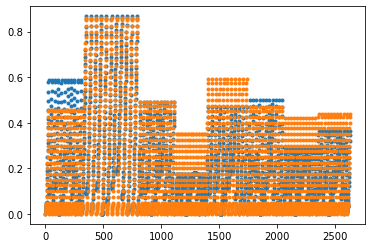

In [10]:
plt.plot(y_pred_train_correctzero,'.')
plt.plot(y_train, '.')

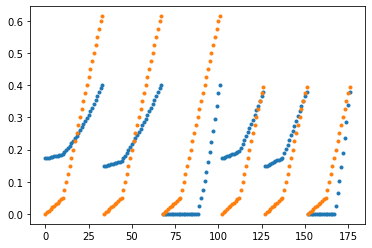

In [11]:
plt.plot(y_pred_test_correctzero,'.')
plt.plot(y_test.reset_index()['fraction'],'.')

In [12]:
scst.pearsonr(y_train, y_pred_train_correctzero)

(0.9327781723613614, 0.0)

In [13]:
scst.pearsonr(y_test, y_pred_test_correctzero)

(0.670760785415617, 1.7279959957258743e-24)

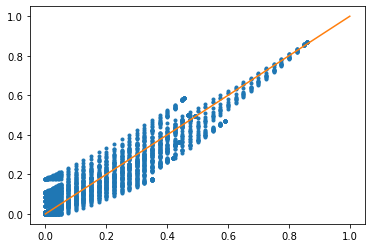

In [14]:
plt.plot(y_train, y_pred_train_correctzero, '.')
plt.plot([0, 1], [0, 1])

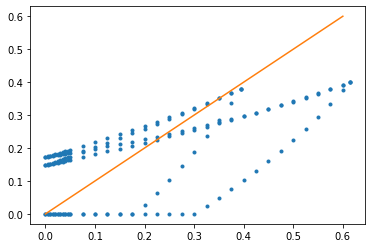

In [15]:
plt.plot(y_test, y_pred_test_correctzero, '.')
plt.plot([0, 0.6], [0, 0.6])

In [16]:
X_train.corr()

,1_156028951-156032951,19_838960-842960,19_35737922-35741922,19_41080891-41084891,4_185745070-185749070,16_75283369-75287369
1_156028951-156032951,1.000000,-0.452109,0.453157,-0.215424,-0.258272,0.553364
19_838960-842960,-0.452109,1.000000,-0.152249,0.445846,0.485498,-0.073092
19_35737922-35741922,0.453157,-0.152249,1.000000,-0.176355,-0.080406,0.749268
19_41080891-41084891,-0.215424,0.445846,-0.176355,1.000000,0.428624,0.003598
4_185745070-185749070,-0.258272,0.485498,-0.080406,0.428624,1.000000,0.203277
16_75283369-75287369,0.553364,-0.073092,0.749268,0.003598,0.203277,1.000000


In [17]:
y_pred_train_coef = X_train['1_156028951-156032951'] * (-0.213) + X_train['19_838960-842960'] * 0.062 + \
                    X_train['19_35737922-35741922'] * (-0.174) + X_train['19_41080891-41084891'] * 0.607 + \
                    X_train['4_185745070-185749070'] * 0.431 + X_train['16_75283369-75287369'] * (-0.321)

In [18]:
y_pred_test_coef = X_test['1_156028951-156032951'] * (-0.213) + X_test['19_838960-842960'] * 0.062 + \
                   X_test['19_35737922-35741922'] * (-0.174) + X_test['19_41080891-41084891'] * 0.607 + \
                   X_test['4_185745070-185749070'] * 0.431 + X_test['16_75283369-75287369'] * (-0.321)

In [19]:
y_pred_train_correctzero = y_pred_train_coef
y_pred_train_correctzero[y_pred_train_correctzero < 0] = 0
train_mae = mean_absolute_error(y_train, y_pred_train_correctzero)
train_mae

0.19189243108036116

In [20]:
y_pred_test_correctzero = y_pred_test_coef
y_pred_test_correctzero[y_pred_test_correctzero < 0] = 0
test_mae = mean_absolute_error(y_test, y_pred_test_correctzero)
test_mae

0.19306358708505852

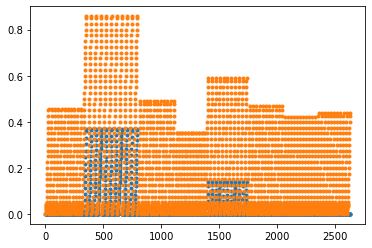

In [21]:
plt.plot(y_pred_train_correctzero,'.')
plt.plot(y_train, '.')

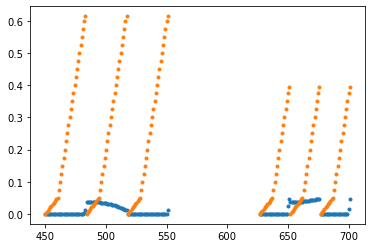

In [22]:
plt.plot(y_pred_test_correctzero,'.')
plt.plot(y_test, '.')

In [24]:
scst.pearsonr(y_train, y_pred_train_correctzero)

(0.7090505439001568, 0.0)

In [25]:
scst.pearsonr(y_test, y_pred_test_correctzero)

(-0.03924235993847669, 0.6040492054998264)

In [23]:
#SHKBP1	0.607		19,41
#ACSL1	0.431		4,185
#BCAR1	-0.321		16,75
#RAB25	-0.213		1,156
#PRTN3	0.062		19,840
#LSR	-0.174		19,35
